In [2]:
#Problem 1

import pandas as pd
import numpy as np

val = -3
n=5
s1 = pd.Series(val, index=np.arange(0, 10, 2))

print(s1)

d = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}

s2 = pd.Series(d)

print(s2)

0   -3
2   -3
4   -3
6   -3
8   -3
dtype: int64
Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


The first one is an unbiased coin flip.
The last three are biased coin flips for 100, 1000 and 10,000 coin flips respectively.


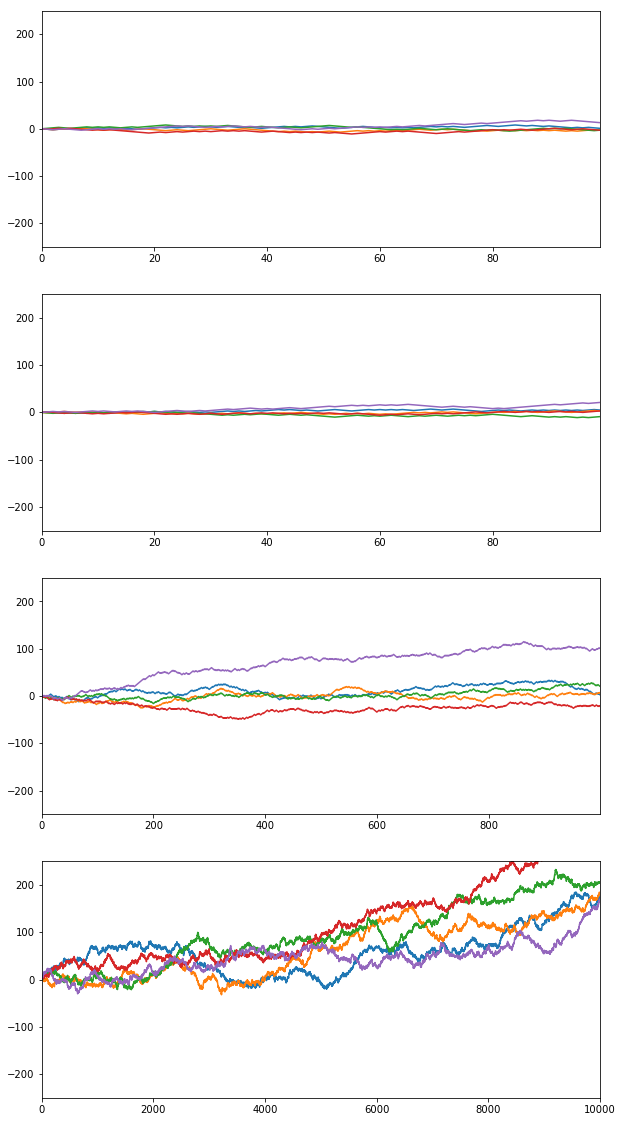

In [32]:
#Problem 2

import matplotlib.pyplot as plt

print("The first one is an unbiased coin flip.")
print("The last three are biased coin flips for 100, 1000 and 10,000 coin flips respectively.")

fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(10)

def randwalk(index, n, prob):
    
    N = n # length of random walk
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, prob, size=(N-1,))*2-1 #coin flips
    s = pd.Series(s)
    s = s.cumsum() # random walk
    
    plt.subplot(4,1,index)
    s.plot()
    plt.ylim([-250, 250])
    
for i in range (0,5):
    randwalk(1,100,0.5)
    
for i in range (0,5):
    randwalk(2,100,0.51)
    
for i in range (0,5):
    randwalk(3,1000,0.51)
    
for i in range (0,5):
    randwalk(4,10000,0.51)
    
plt.show()

In [3]:
#Problem 3

name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

studentInfo[(studentInfo['Sex'].isin(['M'])) & (studentInfo['Age'] > 19) ][['ID','Name']]


,ID,Name
0,0,Mylan
6,6,Matt


In [100]:
#Problem 4

pd.merge(studentInfo[studentInfo['Sex'].isin(['M'])], otherInfo, on='ID', how='inner')[['ID','Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


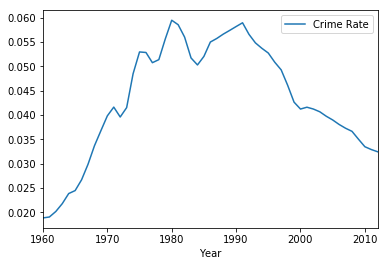

5 years with highest crime rates:
1980 1991 1981 1990 1989


Buglary Mean =  2446286.2075471696
Total Crimes Mean =  10638068.075471697
Years where buglary was higher than mean and total crimes lower than mean =  1973 , 1974


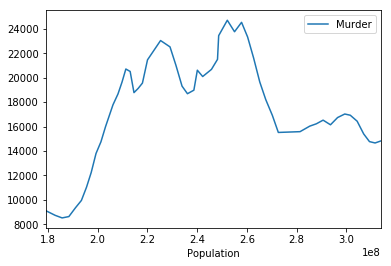

In [183]:
#1
data = pd.read_csv('crime_data.txt', delimiter =",", header = 1, index_col = 0, skiprows=0)

#2
data['Crime Rate'] = data['Total'] / data['Population']

#3
data.plot.line(x=data.index, y='Crime Rate')
plt.show()

#4

data_sort = data.sort_values('Crime Rate', ascending=False)
print("5 years with highest crime rates:")
print(data_sort.index[0],data_sort.index[1],data_sort.index[2],data_sort.index[3],data_sort.index[4])
print("\n")

#5
print("Buglary Mean = ", data["Burglary"].mean())
print("Total Crimes Mean = ", data["Total"].mean())

#6
newdata = data[(data['Burglary'] > data["Burglary"].mean()) & (data['Total'] < data["Total"].mean())]
print("Years where buglary was higher than mean and total crimes lower than mean = ",newdata.index[0], ',', newdata.index[1])

#7
data.plot.line(x='Population', y='Murder')
plt.show()

#8

savedata = data[(data.index > 1979) & (data.index < 1990)][['Population','Violent','Robbery']]
savedata.to_csv("crime_data_selection.csv")